In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Traffic_Flow.csv")

In [3]:
df.head()

,site,day,date,start_time,end_time,flow,flow_pc,cong,cong_pc,dsat,dsat_pc,ObjectId
0,N01111A,TH,05/01/2023,2023/07/04 08:30:00+00,09:45,0,0,0,0,50,98,1
1,N01111A,WE,04/01/2023,2023/07/04 07:30:00+00,08:45,300,100,0,100,22,98,2
2,N01111A,FR,06/01/2023,2023/07/04 09:30:00+00,10:45,445,100,0,100,31,100,3
3,N01111A,TU,03/01/2023,2023/07/04 06:30:00+00,07:45,0,0,0,0,11,32,4
4,N01111A,TH,05/01/2023,2023/07/04 08:45:00+00,10:00,0,0,0,0,50,107,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   site        1048575 non-null  object
 1   day         1048575 non-null  object
 2   date        1048575 non-null  object
 3   start_time  1048575 non-null  object
 4   end_time    1048575 non-null  object
 5   flow        1048575 non-null  int64 
 6   flow_pc     1048575 non-null  int64 
 7   cong        1048575 non-null  int64 
 8   cong_pc     1048575 non-null  int64 
 9   dsat        1048575 non-null  int64 
 10  dsat_pc     1048575 non-null  int64 
 11  ObjectId    1048575 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 96.0+ MB


In [6]:
# Summary statistics for numerical columns
print(df.describe())

               flow       flow_pc          cong       cong_pc          dsat  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.330048e+02  6.874974e+01  5.719858e-01  6.874974e+01  2.428677e+01   
std    2.100803e+02  4.622401e+01  3.554286e+00  4.622401e+01  3.343699e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.600000e+01  1.000000e+02  0.000000e+00  1.000000e+02  1.100000e+01   
75%    1.910000e+02  1.000000e+02  0.000000e+00  1.000000e+02  4.100000e+01   
max    2.142000e+03  2.000000e+02  8.900000e+01  2.000000e+02  1.356000e+03   

            dsat_pc      ObjectId  
count  1.048575e+06  1.048575e+06  
mean   7.088241e+01  5.242880e+05  
std    4.278320e+01  3.026977e+05  
min    0.000000e+00  1.000000e+00  
25%    2.400000e+01  2.621445e+05  
50%    9.700000e+01  5.242880e+05  
75%    1.000000e+02  7.864315e+05  


In [7]:
# Check for missing values
print(df.isnull().sum())

site          0
day           0
date          0
start_time    0
end_time      0
flow          0
flow_pc       0
cong          0
cong_pc       0
dsat          0
dsat_pc       0
ObjectId      0
dtype: int64


## Decision Tree Model:

In [30]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor model
decision_tree = DecisionTreeRegressor()

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search_tree = GridSearchCV(decision_tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train, y_train)

# Best hyperparameters
best_decision_tree = grid_search_tree.best_estimator_

# Evaluate the model on the test set
y_pred_decision_tree = best_decision_tree.predict(X_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print(f'Decision Tree Regressor MSE: {mse_decision_tree}')


Decision Tree Regressor MSE: 14745.224902244347


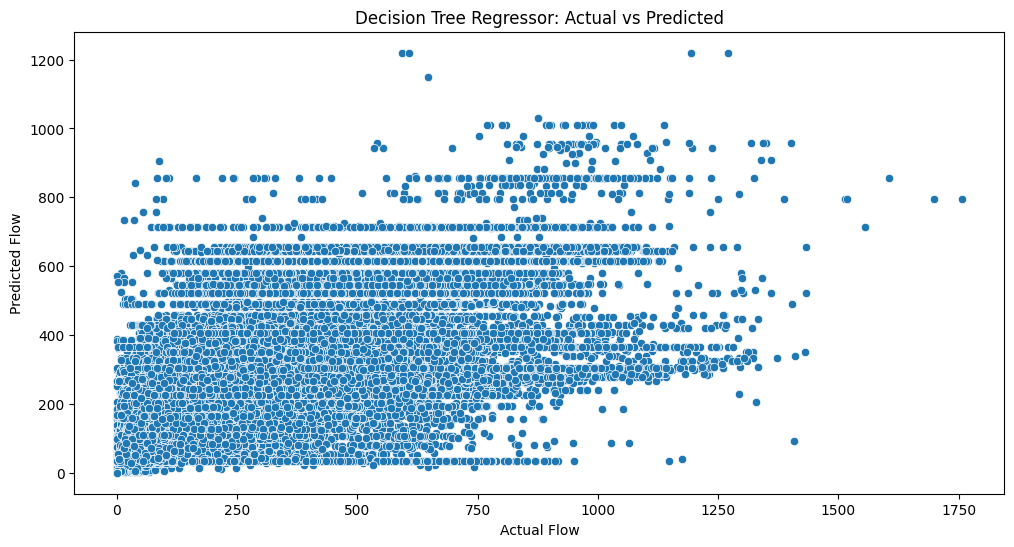

In [31]:
# Scatter plot for Decision Tree Regressor
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_decision_tree)
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.xlabel('Actual Flow')
plt.ylabel('Predicted Flow')
plt.show()

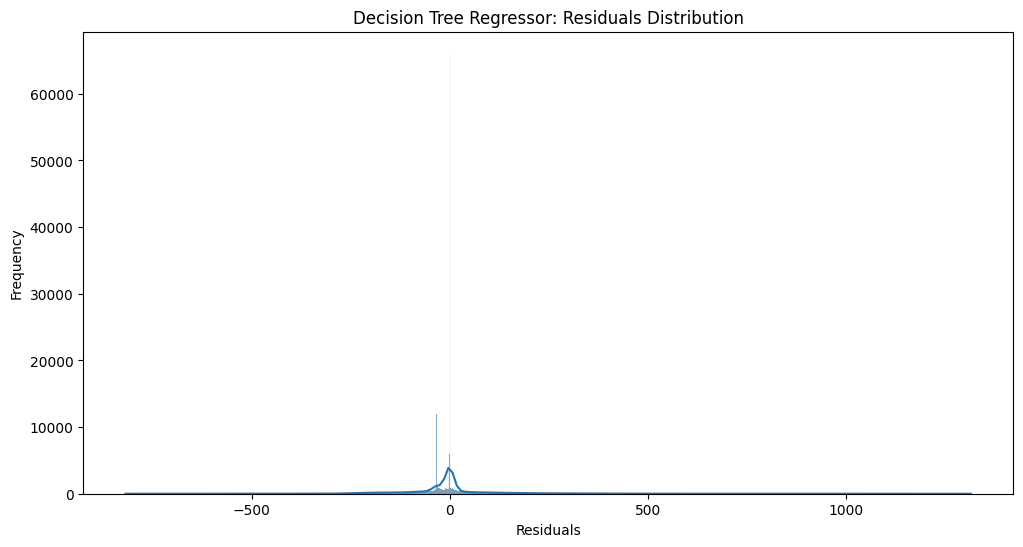

In [32]:
# Residuals plot for Decision Tree Regressor
residuals_decision_tree = y_test - y_pred_decision_tree
plt.figure(figsize=(12, 6))
sns.histplot(residuals_decision_tree, kde=True)
plt.title('Decision Tree Regressor: Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()